In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [102]:
df = pd.read_csv("Hour_score.csv")   # reads first sheet by default
df.head()

,Unnamed: 0,Hours,Scores
0,"2.5,21",2.5,21
1,"5.1,47",5.1,47
2,"3.2,27",3.2,27
3,"8.5,75",8.5,75
4,"3.5,30",3.5,30


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  25 non-null     object 
 1   Hours       25 non-null     float64
 2   Scores      25 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 732.0+ bytes


In [106]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [108]:
df = df.drop(columns = ['Unnamed: 0'])
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [110]:
# Missing + duplicates

df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [112]:
print("Duplicates:", df.duplicated().sum())

Duplicates: 0


In [114]:
# df = df.drop_duplicates()

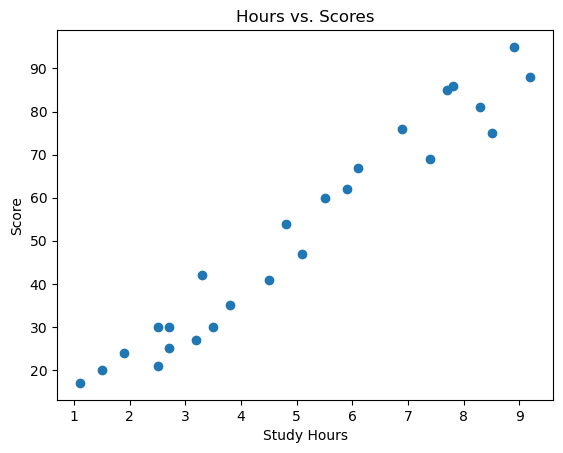

In [116]:
# plot the raw relationship
plt.scatter(df["Hours"], df["Scores"])
plt.xlabel("Study Hours")
plt.ylabel("Score")
plt.title("Hours vs. Scores")
plt.show()

In [118]:
# an upward trend → linear regression is appropriate.

In [120]:
# Prepare X and y
# Regression requires X as 2D and y as 1D.

In [122]:
X = df[["Hours"]]   #2D
y = df["Scores"]    #1D

In [124]:
# Train a Simple Linear Regression Model

In [126]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [128]:
# Extract the Slope and Intercept

In [130]:
slope = model.coef_[0]
intercept = model.intercept_

slope, intercept

(9.77580339078747, 2.483673405373203)

# Interpretation:
1. Slope tells how much score increases when hours increase by 1.
2. Intercept tells predicted score at 0 hours.

In [138]:
# Predict specific hours
hours_to_predict = [[2], [5], [8]]
predicted_scores = model.predict(hours_to_predict)

print("Predicted score for 2 hours:", predicted_scores[0])
print("Predicted score for 5 hours:", predicted_scores[1])
print("Predicted score for 8 hours:", predicted_scores[2])


Predicted score for 2 hours: 22.035280186948143
Predicted score for 5 hours: 51.362690359310555
Predicted score for 8 hours: 80.69010053167295


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [140]:
# Add prediction column
df["Predicted"] = model.predict(X)
df.head()

,Hours,Scores,Predicted
0,2.5,21,26.923182
1,5.1,47,52.340271
2,3.2,27,33.766244
3,8.5,75,85.578002
4,3.5,30,36.698985


In [71]:
#Plot the Regression Line

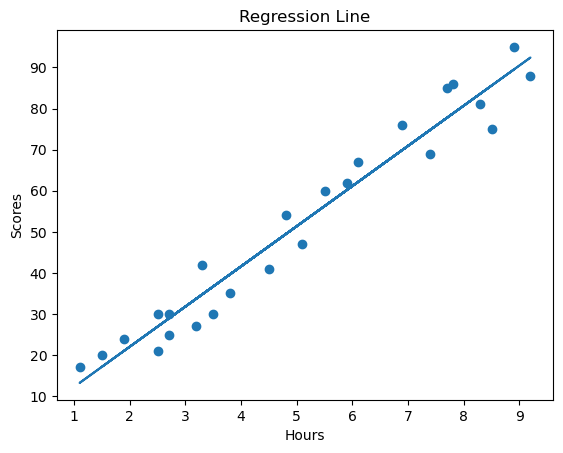

In [73]:
plt.scatter(X,y)
plt.plot(X, model.predict(X))
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Regression Line")
plt.show()

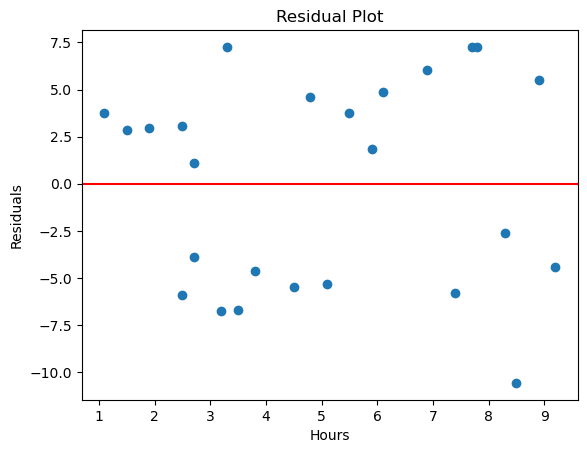

,Hours,Scores,Predicted,Residuals
0,2.5,21,26.923182,-5.923182
1,5.1,47,52.340271,-5.340271
2,3.2,27,33.766244,-6.766244
3,8.5,75,85.578002,-10.578002
4,3.5,30,36.698985,-6.698985


In [144]:
df["Residuals"] = df["Scores"] - df["Predicted"]

# Residual plot
plt.scatter(df["Hours"], df["Residuals"])
plt.axhline(0, color="red")
plt.xlabel("Hours")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

df[["Hours", "Scores", "Predicted", "Residuals"]].head()


In [146]:
from sklearn.metrics import r2_score

y_mean = y.mean()
ss_total = np.sum((y - y_mean)**2)
ss_res = np.sum((y - df["Predicted"])**2)

r2_manual = 1 - (ss_res / ss_total)
r2_sklearn = r2_score(y, df["Predicted"])

print("Manual R²:", r2_manual)
print("sklearn R²:", r2_sklearn)


Manual R²: 0.9529481969048356
sklearn R²: 0.9529481969048356


In [148]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model2 = LinearRegression()
model2.fit(X_train, y_train)

pred_test = model2.predict(X_test)

r2_test = r2_score(y_test, pred_test)
r2_train = r2_score(y_train, model2.predict(X_train))

print("Train R²:", r2_train)
print("Test R²:", r2_test)


Train R²: 0.9491209376364416
Test R²: 0.9678055545167994
